In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Concatenate
from keras.layers import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Layer
from keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from keras.models import model_from_json

json_file = open('keras-facenet-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('keras-facenet-h5/model.h5')

In [ ]:
FRmodel = model

In [ ]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [ ]:
database = {}
database["alina"] = img_to_encoding("images/alina.jpg", FRmodel)
database["gabriel"] = img_to_encoding("images/gabriel.jpg", FRmodel)

In [ ]:
alina = tf.keras.preprocessing.image.load_img("images/alina.jpg", target_size=(160, 160))
gabriel = tf.keras.preprocessing.image.load_img("images/gabriel.jpg", target_size=(160, 160))

In [ ]:
np.around(np.array(gabriel) / 255.0, decimals=12).shape

(160, 160, 3)

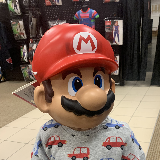

In [ ]:
gabriel

In [ ]:
np.around(np.array(alina) / 255.0, decimals=12).shape

(160, 160, 3)

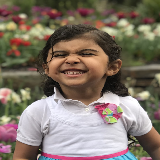

In [ ]:
alina

In [ ]:
def verify(image_path, identity, database, model):
    encoding = img_to_encoding(image_path, model)
    dist = np.linalg.norm(encoding - database[identity])

    if dist < 0.7:
        print("Oy! It's " + str(identity) + ", welcome in!")
        gate_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        gate_open = False
       
    return dist, gate_open